<h2 align=center> Principal Component Analysis</h2>

### Task 2: Load the Data and Libraries
---

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [7]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
iris=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.columns=['Sepal_length','Sepal_width','Petal_length','Petal_width','Species']
iris.dropna(how='all',inplace=True)


In [10]:
iris.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Task 3: Visualize the Data
---

<AxesSubplot: xlabel='Sepal_length', ylabel='Sepal_width'>

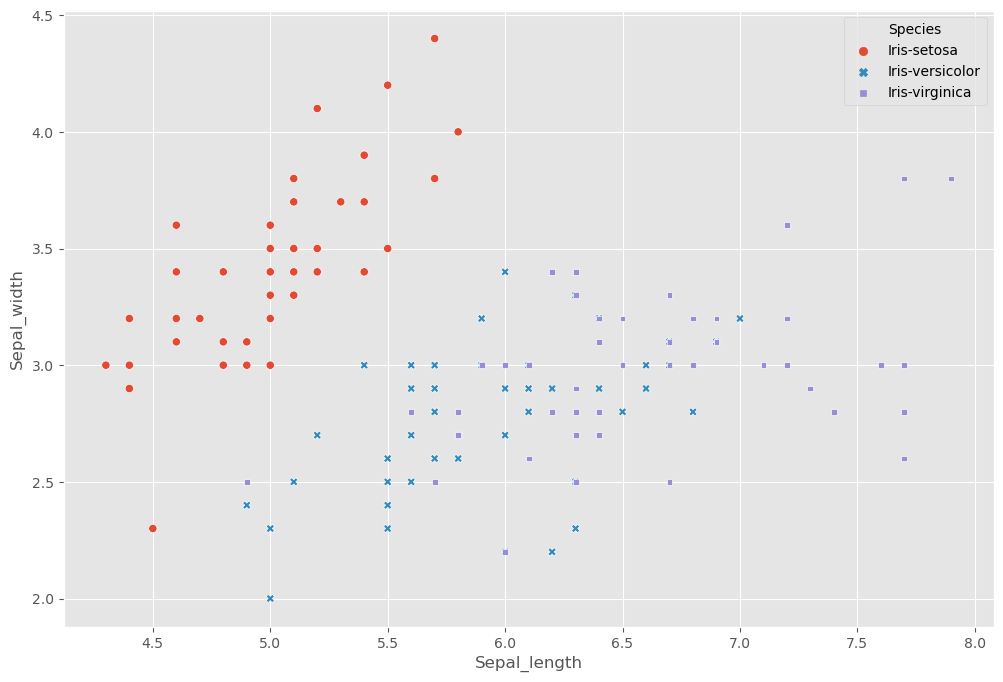

In [12]:
sns.scatterplot(x=iris.Sepal_length,y=iris.Sepal_width,
                hue=iris.Species,style=iris.Species)

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Task 4: Standardize the Data
---

In [15]:
X=iris.iloc[:,0:4].values
y=iris.Species.values

In [16]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [18]:
cov_mat=np.cov(X.T)
print(cov_mat)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [22]:
eigen_vals,eigen_vec=np.linalg.eig(cov_mat)
print("eigenvectors: \n",eigen_vec, "\n")
print("eigenvalsn",eigen_vals, "\n")

eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

eigenvalsn [2.93035378 0.92740362 0.14834223 0.02074601] 



### Task 6: Singular Value Decomposition (SVD)
---

In [24]:
eigen_vec_svd ,s,v=np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

### Task 7: Picking Principal Components Using the Explained Variance
---

In [26]:
for val in eigen_vals:
    print(val)

2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


In [29]:
variance_exp=[(i/sum(eigen_vals))*100 for i in eigen_vals]
variance_exp

[72.77045209380132, 23.03052326768066, 3.6838319576273824, 0.5151926808906327]

In [30]:
cummulative_var_exp=np.cumsum(variance_exp)
cummulative_var_exp

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

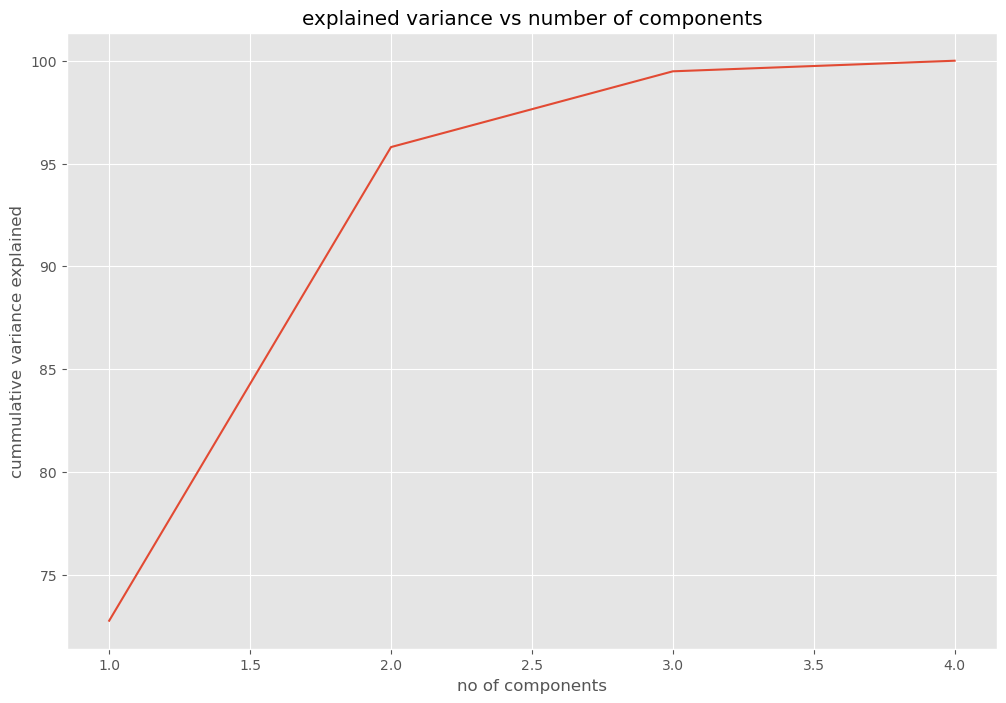

In [31]:
sns.lineplot(x=[1,2,3,4],y=cummulative_var_exp)
plt.xlabel('no of components')
plt.ylabel('cummulative variance explained')
plt.title('explained variance vs number of components')
plt.show()

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

In [32]:
eigen_vec

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [34]:
projection_matrix=eigen_vec[:,:2]
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [35]:
x_pca=X.dot(projection_matrix)

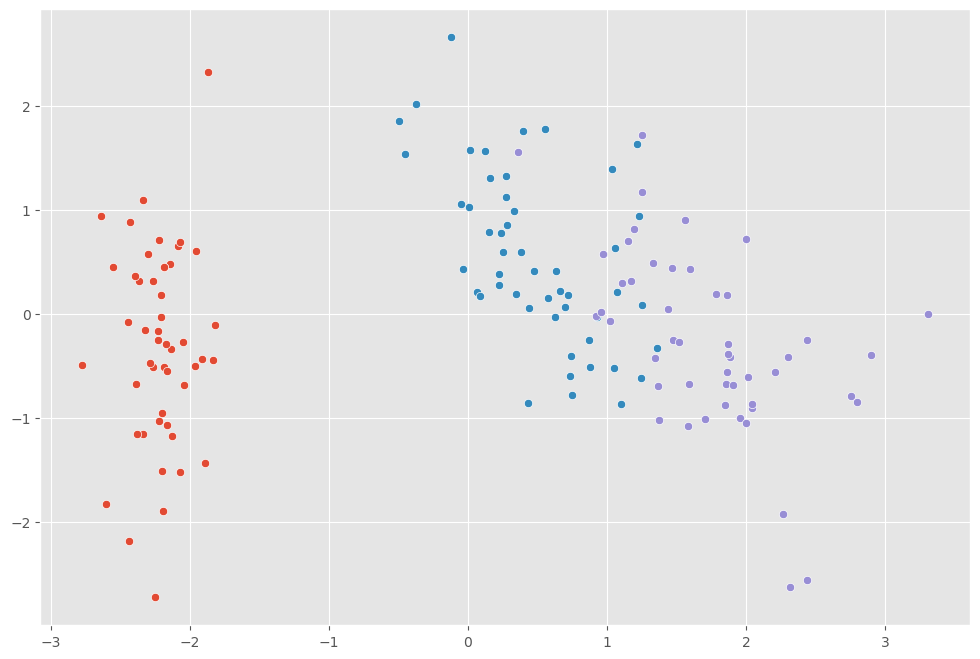

In [38]:
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sns.scatterplot(x=x_pca[y==species,0],
                    y=x_pca[y==species,1])
    